In [152]:
import pandas as pd

In [153]:
df = pd.read_csv('Data-Melbourne_F_fixed.csv')

In [154]:
print(f"Data Display: \n {df.head()}\n\n Data Size: {df.shape}\n\n Null Check: \n{df.isnull().sum()}")

Data Display: 
    Unnamed: 0  Average Outflow  Average Inflow  Energy Consumption  Ammonia  \
0           0            2.941           2.589            175856.0     27.0   
1           1            2.936           2.961            181624.0     25.0   
2           2            2.928           3.225            202016.0     42.0   
3           3            2.928           3.354            207547.0     36.0   
4           4            2.917           3.794            202824.0     46.0   

   Biological Oxygen Demand  Chemical Oxygen Demand  Total Nitrogen  \
0                     365.0                   730.0          60.378   
1                     370.0                   740.0          60.026   
2                     418.0                   836.0          64.522   
3                     430.0                   850.0          63.000   
4                     508.0                  1016.0          65.590   

   Average Temperature  Maximum temperature  Minimum temperature  \
0             

In [155]:
columns = df.columns.tolist()

In [156]:
import matplotlib.pyplot as plt

# for col in columns:
#   plt.plot(df[col])
#   plt.show()

# columns 11(Atmospheric pressure) and 14(Average visibility) have const value with one outlier

In [157]:
df = df.drop(columns=['Average humidity', 'Atmospheric pressure', 'Average visibility'])

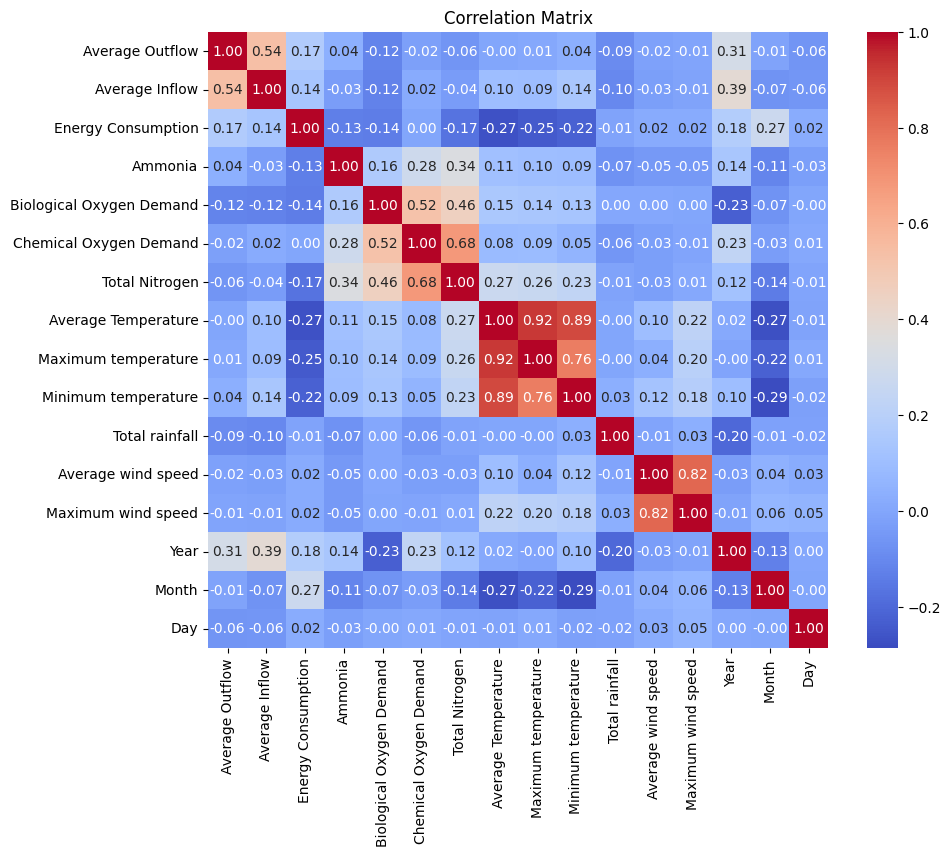

In [158]:
import seaborn as sns

df_x = df.copy()
df_x = df_x.drop(columns=['Unnamed: 0'])
correlation_matrix = df_x.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [159]:
df_x.corr().sum()

,0
Average Outflow,1.714228
Average Inflow,1.968036
Energy Consumption,0.630881
Ammonia,1.799234
Biological Oxygen Demand,1.899373
Chemical Oxygen Demand,2.824280
Total Nitrogen,2.911515
Average Temperature,3.309781
Maximum temperature,3.134239
Minimum temperature,3.243305


In [160]:
# removing -ve correlation, "Energy Consumption" has the lowest correlation, suggesting that it can be a dependent variable

In [161]:
for column in df_x.columns:
    print(f"Unique values in '{column}': {len(df_x[column].unique())}")

Unique values in 'Average Outflow': 1052
Unique values in 'Average Inflow': 1093
Unique values in 'Energy Consumption': 1379
Unique values in 'Ammonia': 48
Unique values in 'Biological Oxygen Demand': 214
Unique values in 'Chemical Oxygen Demand': 221
Unique values in 'Total Nitrogen': 355
Unique values in 'Average Temperature': 230
Unique values in 'Maximum temperature': 195
Unique values in 'Minimum temperature': 162
Unique values in 'Total rainfall': 32
Unique values in 'Average wind speed': 198
Unique values in 'Maximum wind speed': 49
Unique values in 'Year': 6
Unique values in 'Month': 12
Unique values in 'Day': 31


In [162]:
df_x['Energy Consumption'] = df_x['Energy Consumption']/1000.0
# to KWh

In [163]:
df_x.columns

Index(['Average Outflow', 'Average Inflow', 'Energy Consumption', 'Ammonia',
       'Biological Oxygen Demand', 'Chemical Oxygen Demand', 'Total Nitrogen',
       'Average Temperature', 'Maximum temperature', 'Minimum temperature',
       'Total rainfall', 'Average wind speed', 'Maximum wind speed', 'Year',
       'Month', 'Day'],
      dtype='object')

In [164]:
df_x.describe()

,Average Outflow,Average Inflow,Energy Consumption,Ammonia,Biological Oxygen Demand,Chemical Oxygen Demand,Total Nitrogen,Average Temperature,Maximum temperature,Minimum temperature,Total rainfall,Average wind speed,Maximum wind speed,Year,Month,Day
count,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000
mean,3.930608,4.506338,275.159089,39.222302,382.061708,845.960434,62.740752,15.036686,20.530897,10.037337,0.218090,19.482706,35.381259,2016.258321,6.184515,15.584660
std,1.228778,1.439583,44.640534,7.761598,85.996012,145.416540,3.571035,5.398491,7.096760,4.656887,1.306923,7.136868,11.626362,1.583491,3.410588,8.741422
min,0.000004,2.589000,116.638000,13.000000,140.000000,360.000000,40.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,2014.000000,1.000000,1.000000
25%,3.074500,3.643250,246.435750,34.000000,330.000000,751.250000,61.396000,10.800000,15.000000,6.800000,0.000000,14.400000,27.800000,2015.000000,3.000000,8.000000
50%,3.701000,4.161500,275.808000,39.000000,360.000000,845.000000,62.957500,14.300000,19.200000,9.600000,0.000000,18.100000,33.500000,2016.000000,6.000000,15.000000
75%,4.498750,4.847750,305.703750,44.000000,422.980000,920.000000,64.366000,18.575000,25.200000,13.000000,0.000000,23.300000,42.400000,2018.000000,9.000000,23.000000
max,7.920000,18.968000,398.328000,93.000000,850.000000,1700.000000,92.000000,35.500000,43.500000,28.500000,18.030000,49.100000,83.500000,2019.000000,12.000000,31.000000


In [165]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

X=df_x.drop(columns=['Energy Consumption'])
y=df_x['Energy Consumption']

X_scaled = scale.fit_transform(X)

In [166]:
X_scaled.shape

(1382, 15)

In [167]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [168]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score

In [169]:
import numpy as np

def add_bias_term(X):
    return np.c_[np.ones(X.shape[0]), X]

X_train_bias = add_bias_term(X_train)
X_test_bias = add_bias_term(X_test)

class LinearRegressionScratch:
    def __init__(self):
        self.weights = None

    def fit(self, X, y):
        X_transpose = X.T
        self.weights = np.linalg.inv(X_transpose @ X) @ X_transpose @ y

    def predict(self, X):
        return X @ self.weights

    def mean_squared_error(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

lr = LinearRegressionScratch()

lr.fit(X_train_bias, y_train)

y_pred = lr.predict(X_test_bias)

In [170]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")
print(f"Explained Variance Score: {explained_variance}")

Mean Absolute Error (MAE): 30.786653909015033
Mean Squared Error (MSE): 1620.2869915373315
Root Mean Squared Error (RMSE): 40.25278861814833
R² Score: 0.14935839565556508
Explained Variance Score: 0.14996971095934297


In [171]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report
from xgboost import XGBClassifier

In [172]:
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss")
}

param_grids = {
    "Logistic Regression": {
        "penalty": ["l1", "l2", "elasticnet", None],
        "C": [0.1, 1, 10],
        "solver": ["saga"],
        "l1_ratio": [0.1, 0.5, 0.9]
    },
    "SVM": {
        "C": [0.1, 1, 10],
        "kernel": ["linear", "rbf"],
    },
    "K-Nearest Neighbors": {
        "n_neighbors": [3, 5, 7],
        "weights": ["uniform", "distance"],
    },
    "Decision Tree": {
        "criterion": ["gini", "entropy"],
        "max_depth": [10, 20, None],
        "min_samples_split": [2, 5, 10],
    },
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [10, 20, None],
    },
    "AdaBoost": {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 1],
    },
    "XGBoost": {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 0.3],
        "max_depth": [3, 6, 10],
    }
}

y_binned = np.digitize(y, bins=np.percentile(y, [33, 66]))
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_binned, test_size=0.2, random_state=42)

best_models = {}
results = []

for name, model in models.items():
    print(f"Tuning {name}...")
    if name in param_grids:
        try:
            grid = GridSearchCV(
                model,
                param_grids[name],
                cv=3,
                scoring="f1_weighted",
                n_jobs=-1,
                error_score="raise"
            )
            grid.fit(X_train, y_train)
            best_model = grid.best_estimator_
            best_params = grid.best_params_
        except Exception as e:
            print(f"Error tuning {name}: {e}")
            best_model = model
            best_params = "Tuning Failed"
            best_model.fit(X_train, y_train)
    else:
        best_model = model
        best_model.fit(X_train, y_train)
        best_params = "N/A"

    y_pred = best_model.predict(X_test)
    y_prob = best_model.predict_proba(X_test) if hasattr(best_model, "predict_proba") else None
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")
    roc_auc = (
        roc_auc_score(y_test, y_prob, multi_class="ovr", average="weighted")
        if y_prob is not None and len(np.unique(y_binned)) > 2
        else "N/A"
    )

    print(f"Best Parameters for {name}: {best_params}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC Score: {roc_auc}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("-" * 50)

    best_models[name] = best_model
    results.append({
        "Model": name,
        "Best Params": best_params,
        "Accuracy": accuracy,
        "F1 Score": f1,
        "ROC AUC": roc_auc
    })

results_df = pd.DataFrame(results)
print("\nSummary of Model Performance:")
print(results_df)

Tuning Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Best Parameters for Logistic Regression: {'C': 0.1, 'l1_ratio': 0.1, 'penalty': 'l2', 'solver': 'saga'}
Accuracy: 0.4260
F1 Score: 0.4104
ROC AUC Score: 0.6388292003090188

Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.54      0.50        90
           1       0.26      0.18      0.21        91
           2       0.49      0.55      0.52        96

    accuracy                           0.43       277
   macro avg       0.40      0.42      0.41       277
weighted avg       0.40      0.43      0.41       277

--------------------------------------------------
Tuning SVM...
Best Parameters for SVM: {'C': 0.1, 'kernel': 'rbf'}
Accuracy: 0.4549
F1 Score: 0.4505
ROC AUC Score: 0.6311899644872423

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.46      0.49        90
           1       0.34      0.31      0.32        91
           2       0.48      0.59      0.53     

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The XGBClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:11:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters for XGBoost: Tuning Failed
Accuracy: 0.5343
F1 Score: 0.5327
ROC AUC Score: 0.7209593078543653

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.59      0.56        90
           1       0.41      0.38      0.40        91
           2       0.64      0.62      0.63        96

    accuracy                           0.53       277
   macro avg       0.53      0.53      0.53       277
weighted avg       0.53      0.53      0.53       277

--------------------------------------------------

Summary of Model Performance:
                 Model                                        Best Params  \
0  Logistic Regression  {'C': 0.1, 'l1_ratio': 0.1, 'penalty': 'l2', '...   
1                  SVM                        {'C': 0.1, 'kernel': 'rbf'}   
2  K-Nearest Neighbors          {'n_neighbors': 7, 'weights': 'distance'}   
3        Decision Tree  {'criterion': 'gini', 'max_depth': 10, 'min_sa...   
4        Random 